Intro

In [105]:
%matplotlib inline

import numpy as np
import pyautogui
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw, ImageChops

In [6]:
imageDir = 'ImageData'

In [63]:
def boxToBounds(x):
    return [x[0], x[1], x[0]+x[2], x[1]+x[3]]

def shift(box, x, y):
    return [box[0] + x, box[1] + y, box[2], box[3]]

Found Locations: 2


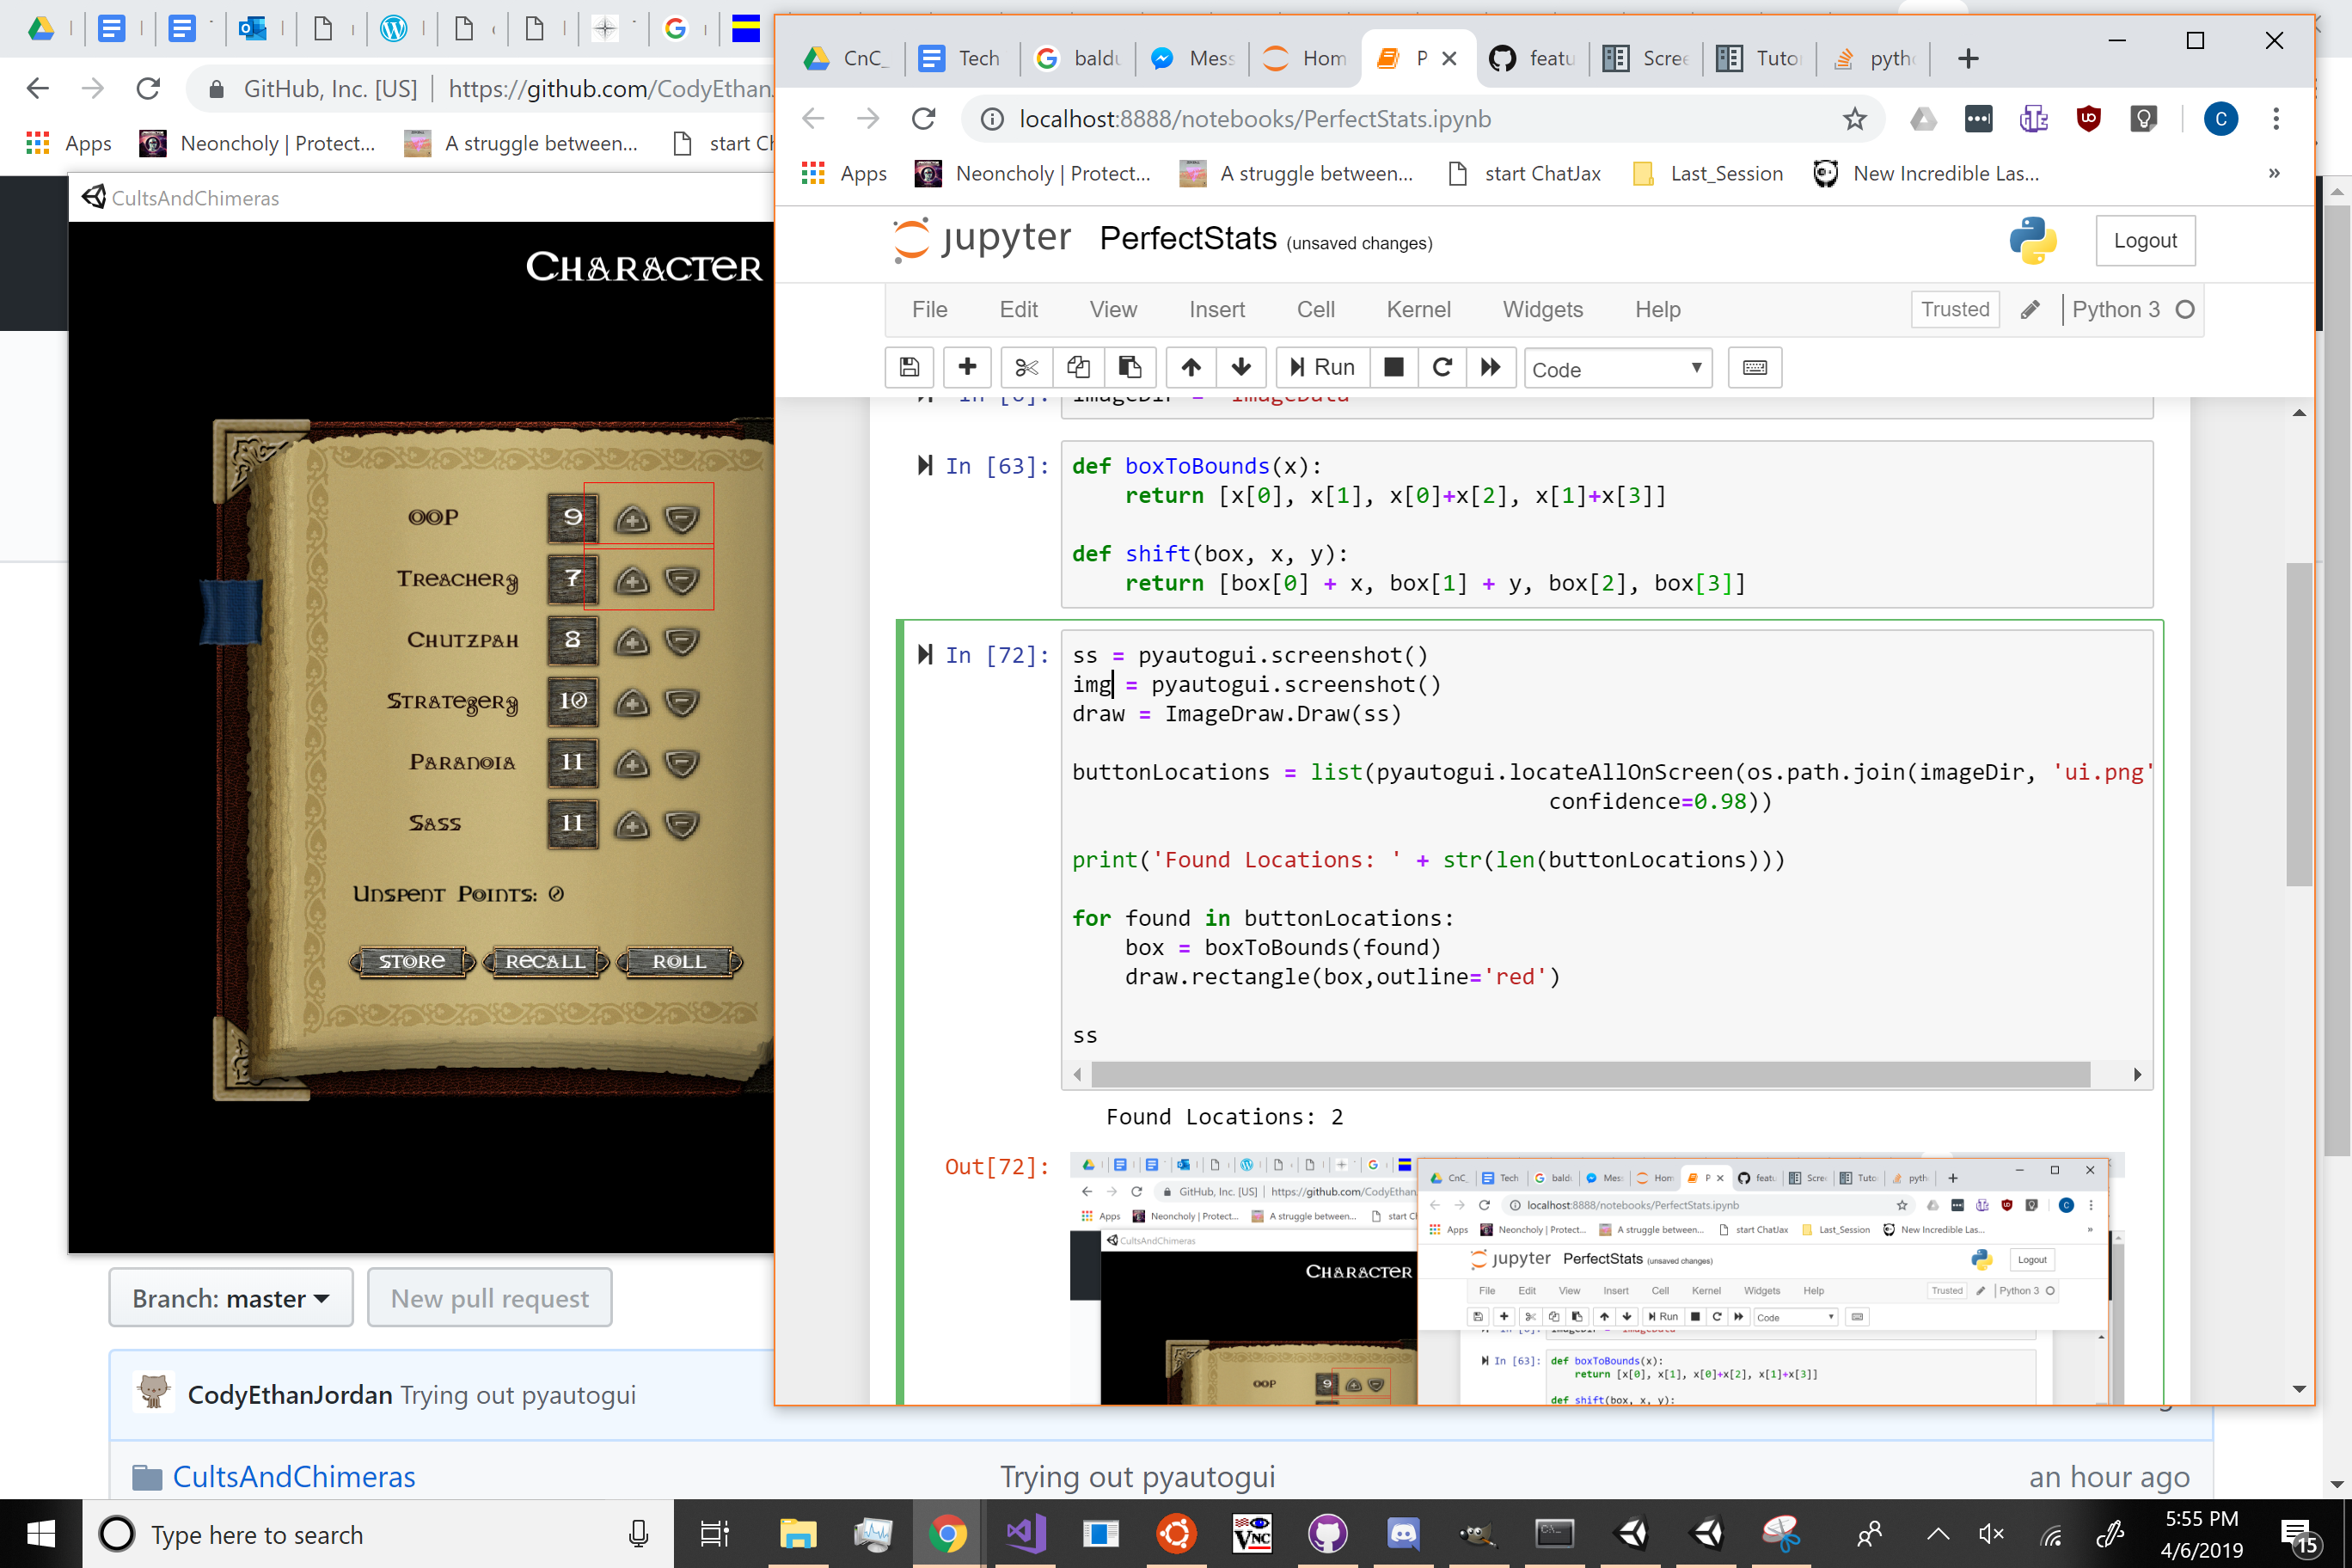

In [85]:
ss = pyautogui.screenshot()
img = pyautogui.screenshot()
draw = ImageDraw.Draw(ss)

buttonLocations = list(pyautogui.locateAllOnScreen(os.path.join(imageDir, 'ui.png'),
                                    confidence=0.98))

print('Found Locations: ' + str(len(buttonLocations)))
    
for found in buttonLocations:
    box = boxToBounds(found)
    draw.rectangle(box,outline='red')

ss

In [95]:
def getNumber(value, location):
    ss = pyautogui.screenshot()
    stat = shift(buttonLocations[0], -40, 10)
    stat[2] -= 100
    stat[3] -= 15

    region = ss.crop(boxToBounds(stat))
    region.save(os.path.join(imageDir, str(value) + '.png'), 'png')
    return region

def getImage(location):
    ss = pyautogui.screenshot()
    stat = shift(buttonLocations[0], -40, 10)
    stat[2] -= 100
    stat[3] -= 15

    region = ss.crop(boxToBounds(stat))
    region.save(os.path.join(imageDir, str(value) + '.png'), 'png')
    return region

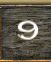

In [86]:
stat = shift(buttonLocations[0], -40, 10)
stat[2] -= 100
stat[3] -= 15

region = img.crop(boxToBounds(stat))
region

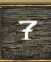

In [88]:
y_dist = buttonLocations[1][1] - buttonLocations[0][1]
stat = shift(buttonLocations[0], -40, 10 + y_dist)
stat[2] -= 100
stat[3] -= 15

region = img.crop(boxToBounds(stat))
region

In [100]:
imageDict = {}

In [116]:
value = 10
imageDict.update({value : getNumber(value, None)})

 
8 154202
9 145480
10 0
7 139822
 
8 96947
9 106791
10 156215
7 19591
 
8 38623
9 94337
10 185639
7 115677
 
8 103240
9 113694
10 183498
7 112100
 
8 209405
9 205799
10 135705
7 213399
 
8 163250
9 159550
10 195248
7 197436


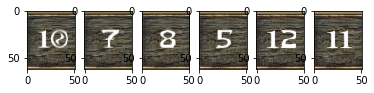

In [117]:
fig, ax = plt.subplots(ncols=6)
img = pyautogui.screenshot()

for i in range(6):
    stat = shift(buttonLocations[0], -40, 10 + y_dist*i)
    stat[2] -= 100
    stat[3] -= 15

    region = img.crop(boxToBounds(stat))
    ax[i].imshow(region)
    print(' ')
    for value, image in imageDict.items():
        diff = ImageChops.difference(image, region)
        diff = np.sum(np.abs(np.array(diff)))
        print(value, diff)